<a href="https://colab.research.google.com/github/aero-ashish/Pose_Classification/blob/main/Final_Intilligence_Trainer_Stage_3_4_Angles_Random_Oversampling_MinMax_GridSearchCV(SVM_ABC_GBM_XGB_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
import pandas as pd

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ='all'


In [ ]:
# Import the Dataframe created in "Final_Intilligence_Trainer_Stage-2(Creating Plane and distance Features).ipynb" with additional features
plank = pd.read_csv('/content/drive/MyDrive/Fitness_Capstone/Updated_Plank.csv')


In [ ]:
plank.drop(plank.columns[0], axis = 1, inplace = True)


In [ ]:
"""
DF1.head()
DF2.head()
DF3.head()
DF4.head()

DF1.describe()
DF2.describe()
DF3.describe()
DF4.describe()
"""

'\nDF1.head()\nDF2.head()\nDF3.head()\nDF4.head()\n\nDF1.describe()\nDF2.describe()\nDF3.describe()\nDF4.describe()\n'

In [ ]:
 
#plank = pd.concat([DF1, DF2, DF3, DF4], axis=0)
#plank['y'] = plank['Plank Type'] + plank['y']
#plank.drop(['Plank Type'], axis = 1, inplace = True)
plank.head()

,nose_X,nose_Y,nose_Z,left_wrist_X,left_wrist_Y,left_wrist_Z,right_wrist_X,right_wrist_Y,right_wrist_Z,left_shoulder_X,...,hip_dist_1,hip_dist_2,wrist_elb_sld_L,wrist_elb_sld_R,elb_sld_hip_L,elb_sld_hip_R,sld_hip_knee_L,sld_hip_knee_R,hip_knee_ankle_L,hip_knee_ankle_R
0,0.178416,0.524573,0.019202,0.159842,0.674994,-0.032997,0.185953,0.640445,0.208227,0.254090,...,0.166610,0.166610,1.477372,1.504835,1.469444,1.563531,0.310169,0.905080,1.111185,0.328382
1,0.874288,0.549263,-0.040175,0.822152,0.689302,0.372729,0.862623,0.850826,-0.159558,0.742064,...,0.269425,0.269425,0.894792,1.253413,1.214143,1.424007,0.677290,0.360755,1.448081,0.177981
2,0.252756,0.491647,-0.026987,0.236398,0.793655,-0.096034,0.255016,0.764256,0.047697,0.328307,...,0.329554,0.329554,1.491698,1.392785,1.500522,1.452594,0.450134,0.521658,1.045228,0.231319
3,0.851493,0.457289,-0.025822,0.827231,0.727376,0.239349,0.842346,0.793775,-0.054237,0.725008,...,0.382879,0.382879,1.225550,0.939709,1.171105,1.232876,0.618196,0.111618,1.412612,0.267976
4,0.786208,0.545905,-0.408749,0.786757,0.825351,-0.472451,0.761726,0.836844,-0.633995,0.702519,...,0.230769,0.230769,0.955789,1.391566,1.367867,1.299241,0.221832,0.257016,1.239324,0.138710


In [ ]:
from google.colab import files
plank.to_csv('Combined1.csv')
#files.download('Combined1.csv')

In [ ]:
plank.describe()


,nose_X,nose_Y,nose_Z,left_wrist_X,left_wrist_Y,left_wrist_Z,right_wrist_X,right_wrist_Y,right_wrist_Z,left_shoulder_X,...,hip_dist_1,hip_dist_2,wrist_elb_sld_L,wrist_elb_sld_R,elb_sld_hip_L,elb_sld_hip_R,sld_hip_knee_L,sld_hip_knee_R,hip_knee_ankle_L,hip_knee_ankle_R
count,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,...,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000
mean,0.490229,0.482331,-0.269972,0.505906,0.775868,-0.255503,0.471672,0.773693,-0.284915,0.514622,...,0.240289,0.240289,0.995103,0.981005,1.328879,1.304628,0.429377,0.383179,1.000460,0.275384
std,0.285583,0.111494,0.302526,0.245694,0.091652,0.358776,0.245450,0.090042,0.349107,0.194310,...,0.089449,0.089449,0.462242,0.473452,0.189825,0.208322,0.298206,0.281034,0.394395,0.171327
min,0.063420,0.150851,-1.438149,0.053159,0.409314,-1.690938,0.071287,0.425673,-1.671561,0.167954,...,0.006193,0.006193,0.034858,0.034802,0.502951,0.373352,0.019891,0.011904,0.080776,0.004411
25%,0.206947,0.402592,-0.510016,0.269233,0.715994,-0.554952,0.256384,0.720105,-0.564116,0.308940,...,0.178745,0.178745,0.601558,0.602928,1.211601,1.176412,0.205437,0.185538,0.745038,0.152070
50%,0.441309,0.477290,-0.115097,0.532598,0.785251,-0.240670,0.394489,0.780750,-0.265134,0.545778,...,0.229115,0.229115,1.080941,1.079299,1.370419,1.351596,0.371070,0.323442,1.084948,0.247863
75%,0.785791,0.552313,-0.034753,0.726996,0.840735,0.082728,0.707379,0.836371,0.043085,0.693561,...,0.284188,0.284188,1.427680,1.411073,1.482231,1.470689,0.592618,0.488042,1.309990,0.374409
max,0.969861,0.792000,0.355256,0.938280,1.220088,0.429426,0.960233,1.093365,0.549415,0.864673,...,0.639577,0.639577,1.569827,1.569992,1.570596,1.570377,1.546656,1.564320,1.569521,1.459927


In [ ]:

#plank.columns

Create Dummy coding for categorical Variables (Plank Type and y) Using
# **Label Encoding** 

In [ ]:
#plank['y'] = pd.Categorical(plank['y']).codes

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



In [ ]:
plank['y'] = le.fit_transform(plank['y'] )

In [ ]:
plank.head()

,nose_X,nose_Y,nose_Z,left_wrist_X,left_wrist_Y,left_wrist_Z,right_wrist_X,right_wrist_Y,right_wrist_Z,left_shoulder_X,...,hip_dist_1,hip_dist_2,wrist_elb_sld_L,wrist_elb_sld_R,elb_sld_hip_L,elb_sld_hip_R,sld_hip_knee_L,sld_hip_knee_R,hip_knee_ankle_L,hip_knee_ankle_R
0,0.178416,0.524573,0.019202,0.159842,0.674994,-0.032997,0.185953,0.640445,0.208227,0.254090,...,0.166610,0.166610,1.477372,1.504835,1.469444,1.563531,0.310169,0.905080,1.111185,0.328382
1,0.874288,0.549263,-0.040175,0.822152,0.689302,0.372729,0.862623,0.850826,-0.159558,0.742064,...,0.269425,0.269425,0.894792,1.253413,1.214143,1.424007,0.677290,0.360755,1.448081,0.177981
2,0.252756,0.491647,-0.026987,0.236398,0.793655,-0.096034,0.255016,0.764256,0.047697,0.328307,...,0.329554,0.329554,1.491698,1.392785,1.500522,1.452594,0.450134,0.521658,1.045228,0.231319
3,0.851493,0.457289,-0.025822,0.827231,0.727376,0.239349,0.842346,0.793775,-0.054237,0.725008,...,0.382879,0.382879,1.225550,0.939709,1.171105,1.232876,0.618196,0.111618,1.412612,0.267976
4,0.786208,0.545905,-0.408749,0.786757,0.825351,-0.472451,0.761726,0.836844,-0.633995,0.702519,...,0.230769,0.230769,0.955789,1.391566,1.367867,1.299241,0.221832,0.257016,1.239324,0.138710


In [ ]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)


{'ForeArmCorrect': 0, 'ForeArmInCorrect': 1, 'HighCorrect': 2, 'HighInCorrect': 3}


## **Test Train Split**





In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = plank.drop( ['y'], axis=1)
Y = plank['y']
X
Y

,nose_X,nose_Y,nose_Z,left_wrist_X,left_wrist_Y,left_wrist_Z,right_wrist_X,right_wrist_Y,right_wrist_Z,left_shoulder_X,...,hip_dist_1,hip_dist_2,wrist_elb_sld_L,wrist_elb_sld_R,elb_sld_hip_L,elb_sld_hip_R,sld_hip_knee_L,sld_hip_knee_R,hip_knee_ankle_L,hip_knee_ankle_R
0,0.178416,0.524573,0.019202,0.159842,0.674994,-0.032997,0.185953,0.640445,0.208227,0.254090,...,0.166610,0.166610,1.477372,1.504835,1.469444,1.563531,0.310169,0.905080,1.111185,0.328382
1,0.874288,0.549263,-0.040175,0.822152,0.689302,0.372729,0.862623,0.850826,-0.159558,0.742064,...,0.269425,0.269425,0.894792,1.253413,1.214143,1.424007,0.677290,0.360755,1.448081,0.177981
2,0.252756,0.491647,-0.026987,0.236398,0.793655,-0.096034,0.255016,0.764256,0.047697,0.328307,...,0.329554,0.329554,1.491698,1.392785,1.500522,1.452594,0.450134,0.521658,1.045228,0.231319
3,0.851493,0.457289,-0.025822,0.827231,0.727376,0.239349,0.842346,0.793775,-0.054237,0.725008,...,0.382879,0.382879,1.225550,0.939709,1.171105,1.232876,0.618196,0.111618,1.412612,0.267976
4,0.786208,0.545905,-0.408749,0.786757,0.825351,-0.472451,0.761726,0.836844,-0.633995,0.702519,...,0.230769,0.230769,0.955789,1.391566,1.367867,1.299241,0.221832,0.257016,1.239324,0.138710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,0.921483,0.384330,0.070793,0.772854,0.782385,0.209587,0.831597,0.970038,-0.184857,0.800290,...,0.342451,0.342451,0.341115,0.182886,0.818633,0.861666,0.533504,0.081263,1.220749,0.482465
793,0.142027,0.462165,-0.099900,0.134673,0.875429,-0.415717,0.230357,0.705539,0.101377,0.276462,...,0.342462,0.342462,0.346970,1.077650,1.172016,1.442325,0.513907,0.868706,0.511489,0.176365
794,0.194702,0.643978,-0.066292,0.119488,0.809315,-0.354345,0.170162,0.738959,0.244420,0.303370,...,0.256966,0.256966,1.272182,1.422283,0.823517,0.872510,0.852376,1.075733,0.813561,0.259262
795,0.160703,0.473621,0.009050,0.133231,0.830143,-0.145078,0.151745,0.811090,0.101270,0.246408,...,0.198883,0.198883,1.459949,1.530921,1.220387,1.171277,0.127269,0.529821,1.163645,0.231554


0      0
1      0
2      0
3      0
4      0
      ..
792    3
793    3
794    3
795    3
796    3
Name: y, Length: 797, dtype: int64



# **Random Oversampling**

In [ ]:
from collections import Counter
from matplotlib import pyplot

Class=0, n=412 (51.694%)
Class=1, n=80 (10.038%)
Class=2, n=276 (34.630%)
Class=3, n=29 (3.639%)


<BarContainer object of 4 artists>

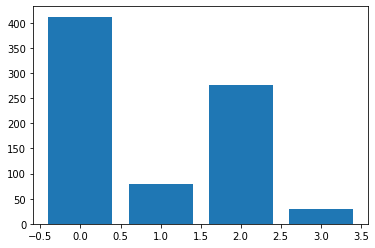

In [ ]:
#summarize distribution
counter = Counter(Y)
for k,v in counter.items():
	per = v / len(Y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()
X, Y = oversample.fit_resample(X, Y)

Class=0, n=412 (25.000%)
Class=1, n=412 (25.000%)
Class=2, n=412 (25.000%)
Class=3, n=412 (25.000%)


<BarContainer object of 4 artists>

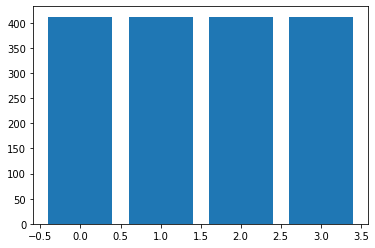

In [ ]:
counter = Counter(Y)
for k,v in counter.items():
	per = v / len(Y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3, random_state=123)
train_X.shape
test_X.shape
train_Y.shape
test_Y.shape


(1153, 68)

(495, 68)

(1153,)

(495,)

# **MinMax Scalar**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

train_X = mms.fit_transform(train_X)
test_X = mms.transform(test_X)


# **Naive** **Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [ ]:
NB_Model = GaussianNB()

NB_Model.fit(train_X,  train_Y)

GaussianNB()

In [ ]:
nb_predictions = NB_Model.predict(test_X)

In [ ]:
# model accuracy for X_test 
accuracy = NB_Model.score(test_X, test_Y)
accuracy

0.6686868686868687

In [ ]:
# model accuracy for train
accuracy2 = NB_Model.score(train_X,  train_Y)
accuracy2

0.7051170858629662

In [ ]:
# creating a confusion matrix
cm = confusion_matrix(test_Y, nb_predictions)
cm

array([[ 71,  47,   6,   2],
       [ 12, 103,   0,   5],
       [  7,   0, 100,  13],
       [ 13,  27,  32,  57]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.69      0.56      0.62       126
           1       0.58      0.86      0.69       120
           2       0.72      0.83      0.78       120
           3       0.74      0.44      0.55       129

    accuracy                           0.67       495
   macro avg       0.68      0.67      0.66       495
weighted avg       0.69      0.67      0.66       495



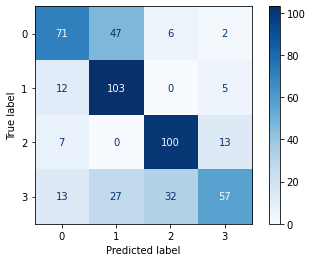

In [ ]:
 plot_confusion_matrix(NB_Model,test_X, test_Y,cmap=plt.cm.Blues)
 print(classification_report(test_Y,nb_predictions))

In [ ]:
# print classification report 
print(classification_report(test_Y, nb_predictions)) 

              precision    recall  f1-score   support

           0       0.69      0.56      0.62       126
           1       0.58      0.86      0.69       120
           2       0.72      0.83      0.78       120
           3       0.74      0.44      0.55       129

    accuracy                           0.67       495
   macro avg       0.68      0.67      0.66       495
weighted avg       0.69      0.67      0.66       495



In [ ]:
# predict probabilities
nb_pp  = NB_Model.predict_proba(test_X)

In [ ]:
#Calculate the log loss
from sklearn.metrics import log_loss

log_loss(test_Y, nb_pp)

3.95416218238552

# **Random Forest** 
https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_grid_search = GridSearchCV(estimator=classifier_rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
rf_grid_search.fit(train_X,  train_Y)


Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
rf_grid_search.best_score_


0.9314596549404076

In [ ]:
rf_best = rf_grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [ ]:
rf_predictions = rf_grid_search.predict(test_X)

In [ ]:
# model accuracy for X_test 
accuracy = rf_grid_search.score(test_X, test_Y)
accuracy

0.9292929292929293

In [ ]:
# model accuracy for train
accuracy2 = rf_grid_search.score(train_X,  train_Y)
accuracy2

0.9661751951431049

In [ ]:
# creating a confusion matrix
cm = confusion_matrix(test_Y, rf_predictions)
cm

array([[106,  13,   6,   1],
       [  3, 107,   3,   7],
       [  2,   0, 118,   0],
       [  0,   0,   0, 129]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.95      0.84      0.89       126
           1       0.89      0.89      0.89       120
           2       0.93      0.98      0.96       120
           3       0.94      1.00      0.97       129

    accuracy                           0.93       495
   macro avg       0.93      0.93      0.93       495
weighted avg       0.93      0.93      0.93       495



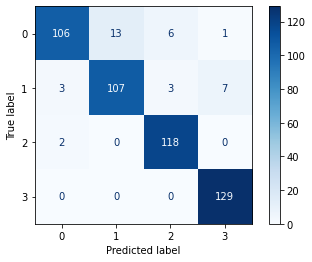

In [ ]:
 plot_confusion_matrix(rf_grid_search,test_X, test_Y,cmap=plt.cm.Blues)
 print(classification_report(test_Y,rf_predictions))

In [ ]:
# print classification report 
print(classification_report(test_Y, rf_predictions)) 

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       126
           1       0.89      0.89      0.89       120
           2       0.93      0.98      0.96       120
           3       0.94      1.00      0.97       129

    accuracy                           0.93       495
   macro avg       0.93      0.93      0.93       495
weighted avg       0.93      0.93      0.93       495



In [ ]:
# predict probabilities
rf_pp  = rf_grid_search.predict_proba(test_X)

In [ ]:
#Calculate the log loss

log_loss(test_Y, rf_pp)

0.27774693522470895

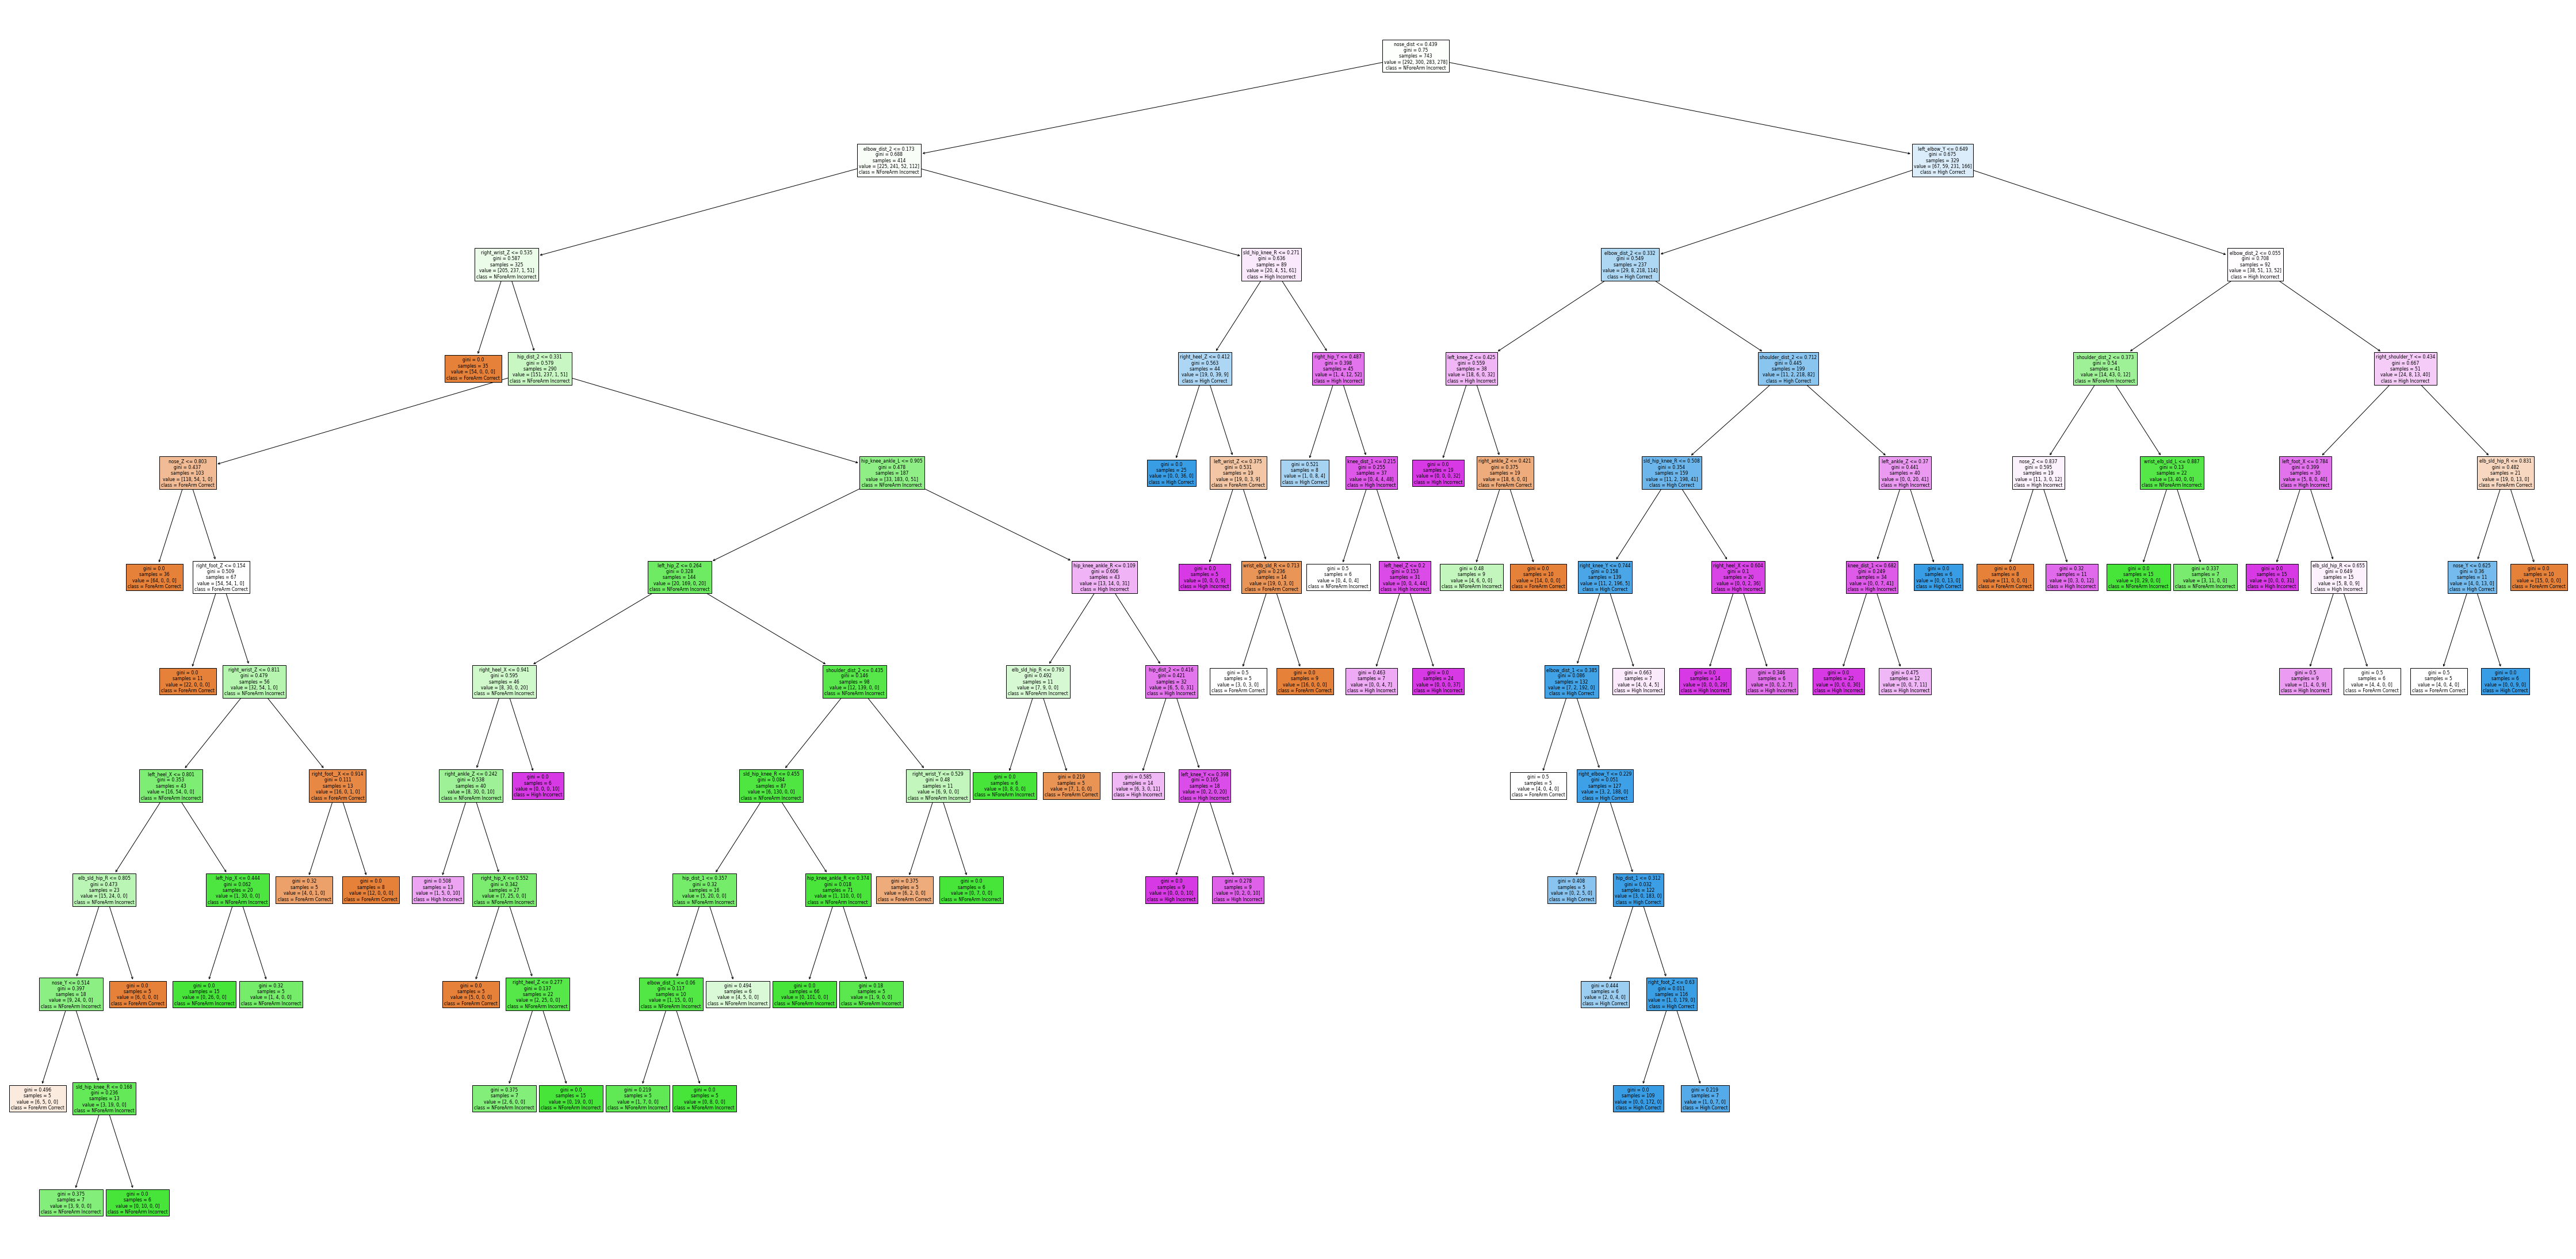

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['ForeArm Correct', "NForeArm Incorrect", 'High Correct', 'High Incorrect'],filled=True);

In [ ]:
rf_best.feature_importances_


array([0.00560991, 0.00611858, 0.02664472, 0.01534886, 0.00413129,
       0.02249677, 0.01390228, 0.00542143, 0.01168754, 0.01146987,
       0.00687126, 0.00965127, 0.00850325, 0.00796128, 0.01329588,
       0.01178781, 0.01698664, 0.01461461, 0.00817701, 0.01097623,
       0.01120936, 0.00547636, 0.00932128, 0.00518269, 0.00693949,
       0.00945589, 0.00629637, 0.005976  , 0.0030753 , 0.00520519,
       0.00692389, 0.00390047, 0.00685085, 0.00456006, 0.00790807,
       0.01247253, 0.00726301, 0.01294126, 0.0125895 , 0.00573311,
       0.00902632, 0.01174479, 0.00502999, 0.01207481, 0.01506267,
       0.00433923, 0.00345687, 0.00754392, 0.00481612, 0.00546391,
       0.00874473, 0.02406159, 0.0670461 , 0.07919979, 0.02761334,
       0.02749856, 0.00957105, 0.01133347, 0.02298964, 0.02005997,
       0.04527592, 0.03856528, 0.03377946, 0.02925145, 0.03056082,
       0.05123883, 0.00763654, 0.00607772])

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

knn_classifier.fit(train_X,  train_Y)


KNeighborsClassifier()

In [ ]:
knn_predictions = knn_classifier.predict(test_X)


In [ ]:
# model accuracy for X_test 
accuracy = knn_classifier.score(test_X, test_Y)
accuracy


0.9191919191919192

In [ ]:
# model accuracy for train
accuracy2 = knn_classifier.score(train_X,  train_Y)
accuracy2

0.94275802254987

In [ ]:
# creating a confusion matrix
cm = confusion_matrix(test_Y, knn_predictions)
cm

array([[104,  17,   2,   3],
       [  5, 108,   0,   7],
       [  0,   0, 114,   6],
       [  0,   0,   0, 129]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.95      0.83      0.89       126
           1       0.86      0.90      0.88       120
           2       0.98      0.95      0.97       120
           3       0.89      1.00      0.94       129

    accuracy                           0.92       495
   macro avg       0.92      0.92      0.92       495
weighted avg       0.92      0.92      0.92       495



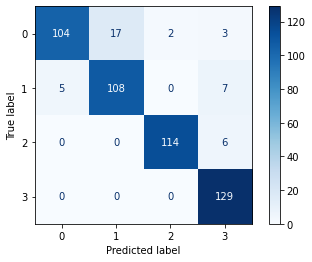

In [ ]:
 plot_confusion_matrix(knn_classifier,test_X, test_Y,cmap=plt.cm.Blues)
 print(classification_report(test_Y,knn_predictions))

In [ ]:
# print classification report 
print(classification_report(test_Y, knn_predictions)) 

              precision    recall  f1-score   support

           0       0.95      0.83      0.89       126
           1       0.86      0.90      0.88       120
           2       0.98      0.95      0.97       120
           3       0.89      1.00      0.94       129

    accuracy                           0.92       495
   macro avg       0.92      0.92      0.92       495
weighted avg       0.92      0.92      0.92       495



In [ ]:
# predict probabilities
knn_pp  = knn_classifier.predict_proba(test_X)

In [ ]:
#Calculate the log loss
from sklearn.metrics import log_loss

log_loss(test_Y, knn_pp)

1.2904770322119874

# *SVM*

In [ ]:
from sklearn.svm import SVC


In [ ]:
# create model

svm_model_linear = SVC(kernel = 'linear', C = 1, probability=True).fit(train_X,  train_Y)


svm_predictions = svm_model_linear.predict(test_X)


In [ ]:
# model accuracy for X_test 
accuracy = svm_model_linear.score(test_X, test_Y)
accuracy


0.8323232323232324

In [ ]:
# model accuracy for train
accuracy2 = svm_model_linear.score(train_X,  train_Y)
accuracy2

0.839549002601908

In [ ]:
# creating a confusion matrix
cm = confusion_matrix(test_Y, svm_predictions)
cm

array([[107,  13,   1,   5],
       [ 12, 101,   0,   7],
       [  2,   0, 107,  11],
       [  4,  23,   5,  97]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.86      0.85      0.85       126
           1       0.74      0.84      0.79       120
           2       0.95      0.89      0.92       120
           3       0.81      0.75      0.78       129

    accuracy                           0.83       495
   macro avg       0.84      0.83      0.83       495
weighted avg       0.84      0.83      0.83       495



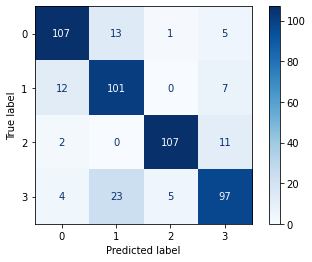

In [ ]:
 plot_confusion_matrix(svm_model_linear,test_X, test_Y,cmap=plt.cm.Blues)
 print(classification_report(test_Y,svm_predictions))

In [ ]:
# print classification report 
print(classification_report(test_Y, svm_predictions)) 

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       126
           1       0.74      0.84      0.79       120
           2       0.95      0.89      0.92       120
           3       0.81      0.75      0.78       129

    accuracy                           0.83       495
   macro avg       0.84      0.83      0.83       495
weighted avg       0.84      0.83      0.83       495



In [ ]:
# predict probabilities
svm_pp  = svm_model_linear.predict_proba(test_X)

In [ ]:
#Calculate the log loss
from sklearn.metrics import log_loss

log_loss(test_Y, svm_pp)

0.5235519635863773

# ***SVM with GridSearchCV***

In [ ]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}

In [ ]:
svc_grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   


In [ ]:
# fitting the model for grid search 
grid_svc_model = svc_grid.fit(train_X,  train_Y) 
 


Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [ ]:
# print best parameter after tuning 
print(grid_svc_model.best_params_) 

   


{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
grid_predictions = grid_svc_model.predict(test_X) 

In [ ]:
# model accuracy for X_test 
accuracy = grid_svc_model.score(test_X, test_Y)
accuracy


0.9050505050505051

In [ ]:
# model accuracy for train
accuracy2 = grid_svc_model.score(train_X,  train_Y)
accuracy2

0.9462272333044233

In [ ]:
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       126
           1       0.86      0.87      0.86       120
           2       0.98      0.92      0.95       120
           3       0.86      1.00      0.92       129

    accuracy                           0.91       495
   macro avg       0.91      0.90      0.90       495
weighted avg       0.91      0.91      0.90       495



In [ ]:
# creating a confusion matrix
cm = confusion_matrix(test_Y, grid_predictions)
cm

array([[105,  17,   2,   2],
       [  6, 104,   0,  10],
       [  1,   0, 110,   9],
       [  0,   0,   0, 129]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.94      0.83      0.88       126
           1       0.86      0.87      0.86       120
           2       0.98      0.92      0.95       120
           3       0.86      1.00      0.92       129

    accuracy                           0.91       495
   macro avg       0.91      0.90      0.90       495
weighted avg       0.91      0.91      0.90       495



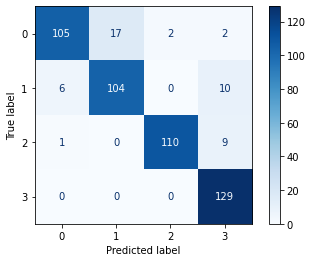

In [ ]:
 plot_confusion_matrix(grid_svc_model,test_X, test_Y,cmap=plt.cm.Blues)
 print(classification_report(test_Y,grid_predictions))

In [ ]:
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       126
           1       0.86      0.87      0.86       120
           2       0.98      0.92      0.95       120
           3       0.86      1.00      0.92       129

    accuracy                           0.91       495
   macro avg       0.91      0.90      0.90       495
weighted avg       0.91      0.91      0.90       495



In [ ]:
# predict probabilities
gridsvm_pp  = grid_svc_model.predict_proba(test_X)

In [ ]:
#Calculate the log loss
from sklearn.metrics import log_loss

log_loss(test_Y, gridsvm_pp)

0.4848067002460883

# ***AdaBoost Classifier***

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)




In [ ]:
# Train Adaboost Classifer


abc_model = abc.fit(train_X,  train_Y)

In [ ]:
#Predict the response for test dataset
abc_predictions= abc_model.predict(test_X)

In [ ]:
# model accuracy for X_test 
accuracy = abc_model.score(test_X, test_Y)
accuracy


0.5838383838383838

In [ ]:
# model accuracy for train
accuracy2 = abc_model.score(train_X,  train_Y)
accuracy2

0.6669557675628794

In [ ]:
# creating a confusion matrix
cm = confusion_matrix(test_Y, abc_predictions)
cm

array([[ 71,  23,   2,  30],
       [ 19,  67,   0,  34],
       [  1,   0, 100,  19],
       [ 13,  15,  50,  51]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.68      0.56      0.62       126
           1       0.64      0.56      0.60       120
           2       0.66      0.83      0.74       120
           3       0.38      0.40      0.39       129

    accuracy                           0.58       495
   macro avg       0.59      0.59      0.58       495
weighted avg       0.59      0.58      0.58       495



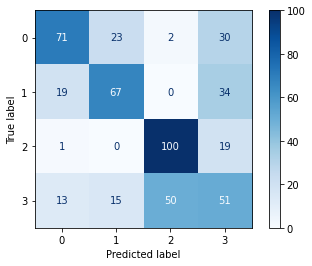

In [ ]:
 plot_confusion_matrix(abc_model,test_X, test_Y,cmap=plt.cm.Blues)
 print(classification_report(test_Y,abc_predictions))

In [ ]:
# print classification report 
print(classification_report(test_Y, abc_predictions)) 

              precision    recall  f1-score   support

           0       0.68      0.56      0.62       126
           1       0.64      0.56      0.60       120
           2       0.66      0.83      0.74       120
           3       0.38      0.40      0.39       129

    accuracy                           0.58       495
   macro avg       0.59      0.59      0.58       495
weighted avg       0.59      0.58      0.58       495



In [ ]:
# predict probabilities
abc_pp  = abc.predict_proba(test_X)

In [ ]:
#Calculate the log loss

log_loss(test_Y, abc_pp)

1.1119008926859517

# ***XGBoost Classifier***

In [ ]:
from xgboost import XGBClassifier


In [ ]:
# fit model no training data
xgb = XGBClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [ ]:
xgb_grid = GridSearchCV(xgb,parameters,cv=5)

xgb_model = xgb_grid.fit(train_X,  train_Y)

In [ ]:
#Predict the response for test dataset
xgb_predictions= xgb_model.predict(test_X)

In [ ]:
# model accuracy for X_test 
accuracy = xgb_model.score(test_X, test_Y)
accuracy


0.9494949494949495

In [ ]:
# model accuracy for train
accuracy2 = xgb_model.score(train_X,  train_Y)
accuracy2

0.97398091934085

In [ ]:
# creating a confusion matrix
cm = confusion_matrix(test_Y, xgb_predictions)
cm

array([[114,   8,   3,   1],
       [  2, 108,   0,  10],
       [  1,   0, 119,   0],
       [  0,   0,   0, 129]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.97      0.90      0.94       126
           1       0.93      0.90      0.92       120
           2       0.98      0.99      0.98       120
           3       0.92      1.00      0.96       129

    accuracy                           0.95       495
   macro avg       0.95      0.95      0.95       495
weighted avg       0.95      0.95      0.95       495



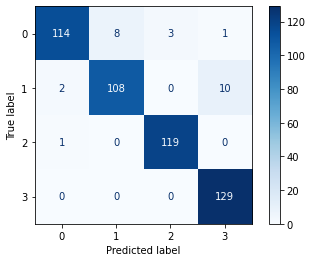

In [ ]:
 plot_confusion_matrix(xgb_model,test_X, test_Y,cmap=plt.cm.Blues)
 print(classification_report(test_Y,xgb_predictions))

In [ ]:
# print classification report 
print(classification_report(test_Y, xgb_predictions)) 

              precision    recall  f1-score   support

           0       0.97      0.90      0.94       126
           1       0.93      0.90      0.92       120
           2       0.98      0.99      0.98       120
           3       0.92      1.00      0.96       129

    accuracy                           0.95       495
   macro avg       0.95      0.95      0.95       495
weighted avg       0.95      0.95      0.95       495



In [ ]:
# predict probabilities
xgb_pp  = xgb_model.predict_proba(test_X)

In [ ]:
#Calculate the log loss
from sklearn.metrics import log_loss

log_loss(test_Y, xgb_pp)

0.1719662214092245

# ***ABC using SVC as base Learner***

In [ ]:
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

In [ ]:
# Train Adaboost Classifer
abc_svc_model = abc.fit(train_X,  train_Y)

In [ ]:
#Predict the response for test dataset
abc_svc_predictions= abc_svc_model.predict(test_X)

In [ ]:
# model accuracy for X_test 
accuracy = abc_svc_model.score(test_X, test_Y)
accuracy


0.4767676767676768

In [ ]:
# model accuracy for train
accuracy2 = abc_svc_model.score(train_X,  train_Y)
accuracy2

0.5758889852558543

In [ ]:
# creating a confusion matrix
cm = confusion_matrix(test_Y, abc_svc_predictions)
cm

array([[58, 57,  3,  8],
       [11, 70,  0, 39],
       [ 3, 28, 62, 27],
       [ 8, 40, 35, 46]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.72      0.46      0.56       126
           1       0.36      0.58      0.44       120
           2       0.62      0.52      0.56       120
           3       0.38      0.36      0.37       129

    accuracy                           0.48       495
   macro avg       0.52      0.48      0.49       495
weighted avg       0.52      0.48      0.48       495



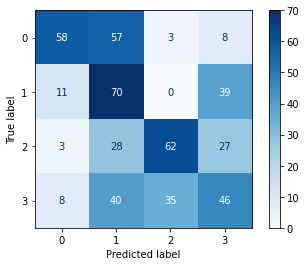

In [ ]:
 plot_confusion_matrix(abc_svc_model,test_X, test_Y,cmap=plt.cm.Blues)
 print(classification_report(test_Y,abc_svc_predictions))

In [ ]:
# print classification report 
print(classification_report(test_Y, abc_svc_predictions)) 

              precision    recall  f1-score   support

           0       0.72      0.46      0.56       126
           1       0.36      0.58      0.44       120
           2       0.62      0.52      0.56       120
           3       0.38      0.36      0.37       129

    accuracy                           0.48       495
   macro avg       0.52      0.48      0.49       495
weighted avg       0.52      0.48      0.48       495



In [ ]:
xgb_predictions

array([2, 2, 1, 3, 0, 3, 2, 2, 1, 2, 3, 1, 0, 3, 0, 3, 3, 2, 2, 2, 3, 3,
       0, 3, 1, 1, 3, 3, 0, 1, 1, 0, 0, 1, 3, 0, 1, 1, 1, 2, 2, 0, 1, 0,
       2, 0, 2, 0, 1, 3, 1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 3, 3, 0, 0, 2, 0,
       3, 3, 2, 3, 2, 3, 1, 2, 0, 2, 3, 2, 2, 2, 2, 3, 1, 3, 1, 2, 0, 1,
       3, 3, 0, 0, 2, 3, 1, 1, 1, 2, 2, 3, 0, 0, 3, 1, 2, 1, 3, 0, 2, 0,
       1, 3, 0, 3, 1, 0, 2, 1, 3, 3, 2, 1, 1, 3, 0, 2, 1, 1, 2, 3, 0, 3,
       1, 3, 0, 0, 1, 3, 1, 2, 1, 2, 3, 0, 2, 3, 1, 2, 0, 1, 1, 1, 3, 2,
       1, 3, 0, 3, 2, 0, 0, 0, 3, 2, 3, 0, 0, 0, 3, 3, 0, 3, 3, 3, 2, 1,
       1, 1, 1, 0, 3, 2, 1, 0, 1, 3, 0, 0, 3, 1, 3, 2, 3, 3, 1, 0, 1, 2,
       0, 2, 2, 2, 0, 3, 3, 0, 2, 3, 3, 3, 0, 0, 3, 3, 1, 2, 1, 2, 2, 2,
       1, 1, 3, 2, 0, 3, 3, 1, 2, 0, 0, 3, 1, 1, 3, 3, 2, 3, 3, 2, 3, 0,
       1, 1, 3, 3, 1, 2, 2, 0, 2, 2, 3, 0, 0, 3, 0, 0, 2, 2, 2, 1, 0, 0,
       3, 1, 2, 1, 3, 0, 2, 0, 1, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 3,
       2, 3, 2, 3, 1, 1, 2, 3, 2, 2, 2, 1, 0, 2, 3,

In [ ]:
# predict probabilities
svc_abc_pp  = abc_svc_model.predict_proba(test_X)

In [ ]:
#Calculate the log loss
from sklearn.metrics import log_loss

log_loss(test_Y, svc_abc_pp)

1.2030017630175676

# ***Gradient Boosting Classifier***

In [ ]:
import lightgbm as lgb


In [ ]:
lgb=lgb.LGBMClassifier()

parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}

In [ ]:
lgb_grid = GridSearchCV(lgb,parameters,cv=5)

lgb_model = lgb_grid.fit(train_X,  train_Y)

In [ ]:
#Predict the response for test dataset
lgb_predictions= lgb_model.predict(test_X)

In [ ]:
# model accuracy for X_test 
accuracy = lgb_model.score(test_X, test_Y)
accuracy


In [ ]:
# creating a confusion matrix
cm = confusion_matrix(test_Y, lgb_predictions)
cm

In [ ]:
 plot_confusion_matrix(gbc_model,test_X, test_Y,cmap=plt.cm.Blues)
 print(classification_report(test_Y,lgb_predictions))

In [ ]:
# print classification report 
print(classification_report(test_Y, lgb_predictions)) 

In [ ]:
# predict probabilities
lgb_pp  = lgb_model.predict_proba(test_X)

In [ ]:
#Calculate the log loss
from sklearn.metrics import log_loss

log_loss(test_Y, lgb_pp)

In [ ]:
# print classification report 
print(classification_report(test_Y, lgb_predictions)) 